In [302]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA, FastICA,  IncrementalPCA, NMF
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from glob import glob
import json
import os
import random
from keras.preprocessing.image import img_to_array, load_img 

In [253]:
images = os.listdir("crop_part1")
images=images[1:]

In [ ]:
# images=random.sample(glob('crop_part1/*'),500)
# img = load_img(images[0], target_size=(224,224))
# # convert from 'PIL.Image.Image' to numpy array
# img = np.array(img)

"\nimages=random.sample(glob('crop_part1/*'),500)\nimg = load_img(images[0], target_size=(224,224))\n# convert from 'PIL.Image.Image' to numpy array\nimg = np.array(img)\n"

In [284]:
#plt.imshow(img)

In [256]:
data = {}
for image in images:
    data[image] = np.array(load_img("crop_part1/" + image)).flatten().reshape(1,120000)

In [257]:
keys = np.array(list(data.keys()))
feats = np.array(list(data.values()))

In [258]:
nsamples, nx, ny = feats.shape
feats = feats.reshape((nsamples,nx*ny))

In [312]:
n_components = 70
pca = PCA(n_components=70)
transformed_images=pca.fit_transform(faces_centered)

In [313]:
print(f"Components before PCA: {len(feats[0])}")
print(f"Components after PCA: {pca.n_components}")

Components before PCA: 120000
Components after PCA: 70


In [314]:
variance_explained = np.cumsum(pca.explained_variance_ratio_)
print(f'The first {n_components} principal componenets explain {variance_explained[-1]:.3f} % of the variance')

The first 70 principal componenets explain 0.837 % of the variance


In [219]:
ica = FastICA(n_components=20)
transformed_images_ica = ica.fit_transform(transformed_images)

In [337]:
kmeans = KMeans(n_clusters=10 ,n_jobs=6, random_state=42)
kmeans.fit(transformed_images)

KMeans(n_clusters=2, n_jobs=6, random_state=42)

In [327]:
#plt.imshow(pca.inverse_transform(transformed_images[4]).reshape(200,200,3))

In [339]:
groups = {}
for file, cluster in zip(images,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [340]:
# count=0
# temp=[]
# clusterNR = 3
# for i in groups[clusterNR]:
#     temp.append(load_img((glob(str(groups[clusterNR][count])))[0],target_size=(200,200)))
#     count +=1
# plt.imshow(temp[4])

In [341]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    files = groups[cluster]
    if len(files) > 50:
        files = files[:]
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img("crop_part1/"+file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Cluster{cluster}')

In [342]:
groups[2]
temp=[]
for i in groups[2]:
    temp.append(i.replace('crop_part1\\',''))

KeyError: 2

In [343]:
def update_dataframe_with_clusters(cluster):
    df_info['cluster'] = 0
    for key in cluster:
        df_info.loc[df_info.FileName.isin(cluster[key]), 'cluster'] = key

df_info=pd.read_csv("ImageInfo.csv")
update_dataframe_with_clusters(groups)

<AxesSubplot:title={'center':'Age'}, xlabel='[cluster]'>

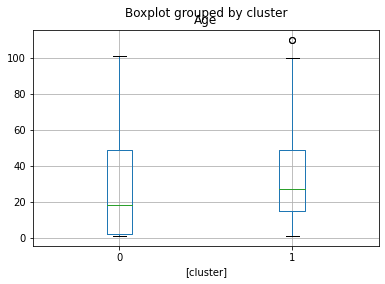

In [344]:
df_info.boxplot(column=['Age'], by=['cluster'])

In [345]:
view_cluster(2)

KeyError: 2

<Figure size 1800x1800 with 0 Axes>

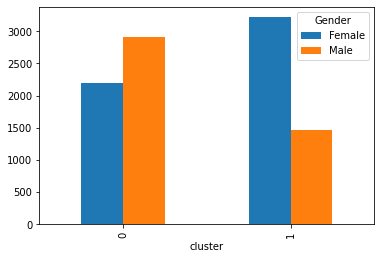

In [346]:
_  = pd.crosstab(df_info['cluster'],df_info['Gender']).plot.bar()

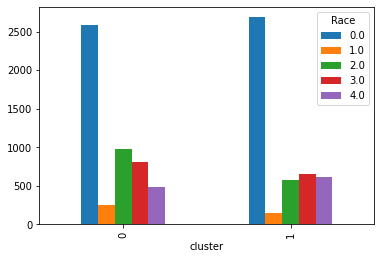

In [347]:
_  = pd.crosstab(df_info['cluster'],df_info['Race']).plot.bar()

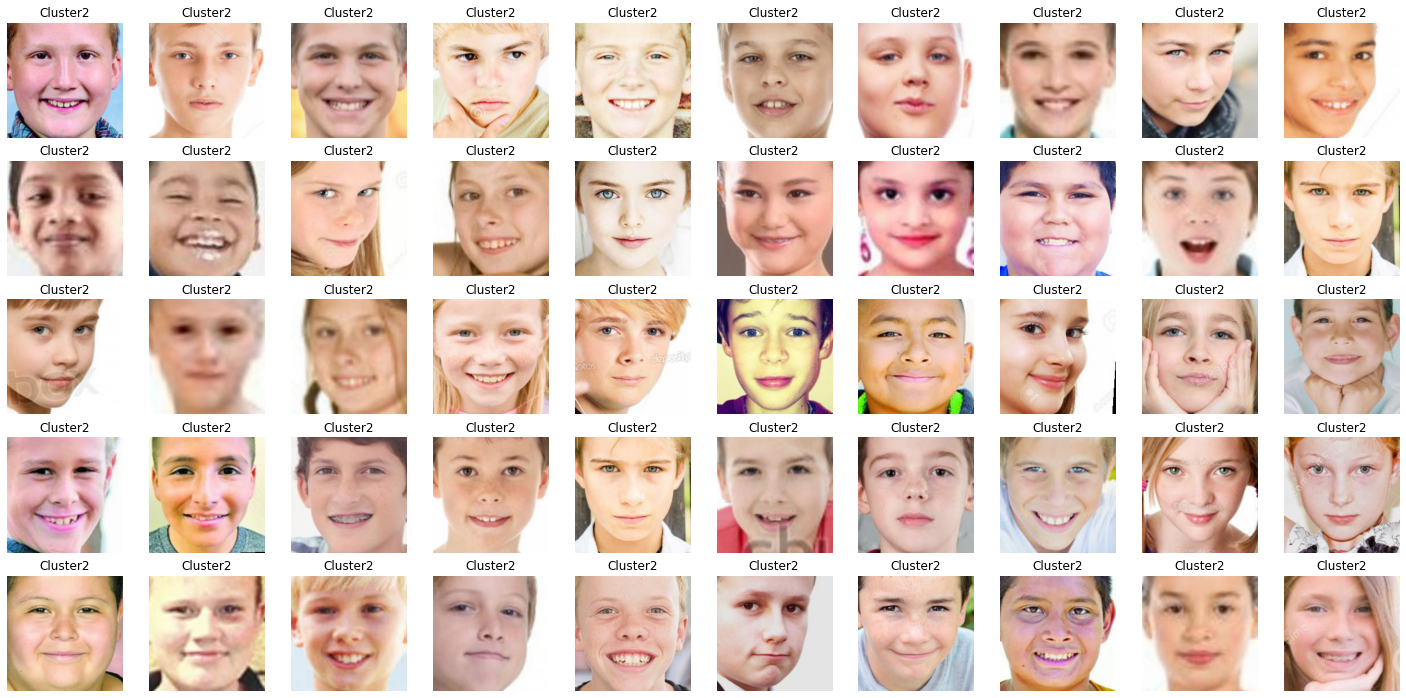

In [300]:
view_cluster(2)

In [307]:
n_components = 25

estimator = NMF(n_components = n_components, init = 'random', tol=5e-3, shuffle=True, verbose=2)    
W = estimator.fit_transform(feats)

In [309]:
# global centering
faces_centered = feats - feats.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(len(images), -1)

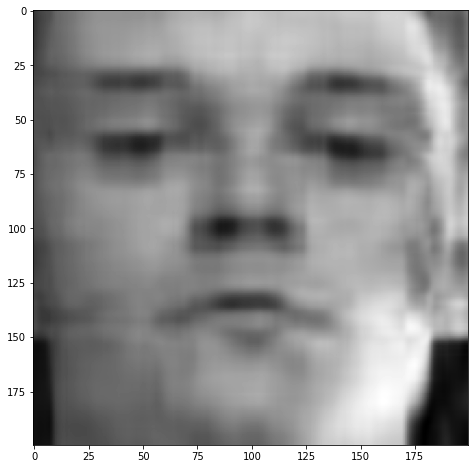

In [242]:
pca = PCA(n_components=4)
image_recon = pca.inverse_transform(pca.fit_transform(X[0]))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

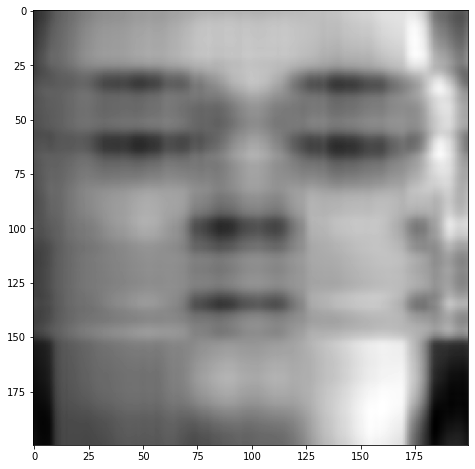

In [234]:
ica = FastICA(n_components=3)
image_recon_ica = ica.inverse_transform(ica.fit_transform(image_recon))
 
# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon_ica,cmap = plt.cm.gray)